# profits

#### Ether

In [1]:
import numpy as np
import csv    #加载csv包便于读取csv文件
import zipfile
import os
import json
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import datetime
import time
from datetime import timedelta

def date_2_timestamp(year,mon,day):
    tempString=str(year)+"-"+str(mon)+"-"+str(day)
    tempTime=time.strptime(tempString, "%Y-%m-%d")
    return time.mktime(tempTime)

def timestamp_2_date(un_time):
    return datetime.datetime.fromtimestamp(un_time)


def timestamp_removeDay_reduce(temp_timestamp):
    temp_date=timestamp_2_date(temp_timestamp)
    temp_timestamp=date_2_timestamp(temp_date.year,temp_date.month,1)
    return temp_timestamp

def timestamp_removeHour_reduce(temp_timestamp):
    temp_date=timestamp_2_date(temp_timestamp)
    temp_timestamp=date_2_timestamp(temp_date.year,temp_date.month,temp_date.day)
    return temp_timestamp

def timestamp_removeDay_add(temp_timestamp):
    temp_date=timestamp_2_date(temp_timestamp)
    if temp_date.month==12:
        return date_2_timestamp(temp_date.year+1,1,1)
    else:
        return date_2_timestamp(temp_date.year,temp_date.month+1,1)
    
def date_removeDay_reduce(temp_date):
    temp_timestamp=date_2_timestamp(temp_date.year,temp_date.month,1)
    return timestamp_2_date(temp_timestamp)

def date_removeHour_reduce(temp_date):
    temp_timestamp=date_2_timestamp(temp_date.year,temp_date.month,temp_date.day)
    return timestamp_2_date(temp_timestamp)

def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

# 返回从最小到最大之间经过的时间戳，间隔为一个月
def max_min_2_timestampList(minDate,maxDate):    
    resList=[]
    resMap={}
    for single_date in daterange(minDate, maxDate):
        temp_date=date_removeDay_reduce(single_date)
        temp_timestamp=date_2_timestamp(temp_date.year,temp_date.month,temp_date.day)
        resMap[temp_timestamp]=1 

    for key in resMap.keys():
        resList.append(key)
    
    # print(resList)
    return sorted(resList)

# 返回从最小到最大之间经过的时间戳，间隔为一天

def max_min_2_timestampList_day(minDate,maxDate):    
    resList=[]
    resMap={}
    for single_date in daterange(minDate, maxDate):
        # temp_date=date_removeHour_reduce(single_date)
        temp_timestamp=date_2_timestamp(single_date.year,single_date.month,single_date.day)
        resMap[temp_timestamp]=1 

    for key in resMap.keys():
        resList.append(key)
    
    # print(resList)
    return sorted(resList)


def timestamp_2_string(temp_timestamp):
    temp_date=datetime.datetime.fromtimestamp(temp_timestamp)
    if temp_date.month<10:
        tempMonth="0"+str(temp_date.month)
    else:
        tempMonth=str(temp_date.month)
    return str(temp_date.year)+"-"+tempMonth

import calendar
def timestamp_2_string_ymd(temp_timestamp):
    temp_date=datetime.datetime.fromtimestamp(temp_timestamp)
    # if temp_date.month<10:
    #     tempMonth="0"+str(temp_date.month)
    # else:
    #     tempMonth=str(temp_date.month)
        
    tempMonth=calendar.month_abbr[int(temp_date.month)]
        
    if temp_date.day<10:
        tempDay="0"+str(temp_date.day)
    else:
        tempDay=str(temp_date.day)
    return tempMonth+"-"+tempDay+"-"+str(temp_date.year)

#### NFT price

/tmp/ipykernel_1714221/858769851.py:13: DtypeWarning: Columns (2,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/mnt/sde1/geth/nft_analyse_v1/data/nftflow/csv/nftFlow_final.csv")


nft zhonglei:  41259
sum tx:  33229
sum tx fee:  31945621.40120228


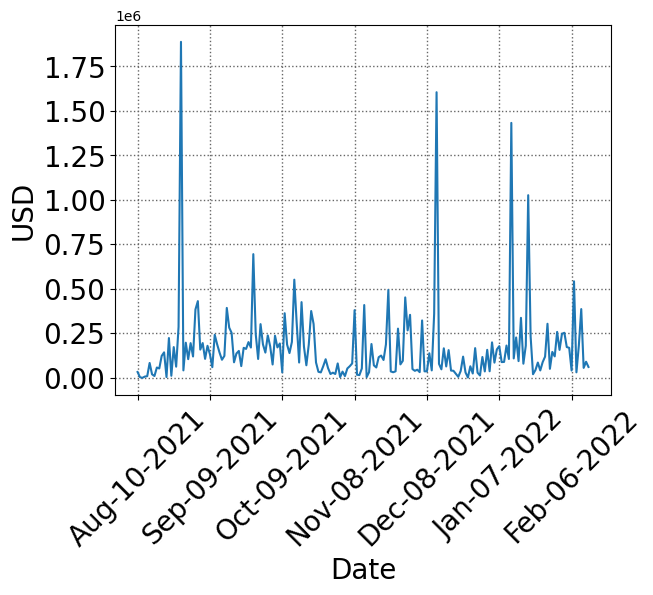

In [5]:
import numpy as np
import csv    #加载csv包便于读取csv文件
import zipfile
import os
import json
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

df=pd.read_csv("/mnt/sde1/geth/nft_analyse_v1/data/nftflow/csv/nftFlow_final.csv")
df = df[ (df["isError_1"]!="none") ]
tx_map={}
timestamp_map={}
nftSet=set()
for index,row in df.iterrows():
    timestamp=row["timestamp"]
    timestamp=timestamp_removeHour_reduce(timestamp)
    tokenAddress=row["tokenAddress"]
    tokenId=row["tokenId"]
    nftPrice=float(row["nftPrice_usd"])
    
    tx_map[row["transactionHash_0"]]={"nftPrice":nftPrice,"timestamp":timestamp}
    
    nftSet.add(tokenAddress+"_"+str(tokenId))
    
print("nft zhonglei: ",len(nftSet))

    
for key,value in tx_map.items():
    try:
        timestamp_map[value["timestamp"]]+=value["nftPrice"]
    except:
        timestamp_map[value["timestamp"]]=value["nftPrice"]

print("sum tx: ",len(tx_map))
print("sum tx fee: ",sum(timestamp_map.values()))
        
list_key=[]
list_value=[]
minDate=datetime.datetime.fromtimestamp( min(df["timestamp"]) )
maxDate=datetime.datetime.fromtimestamp( max(df["timestamp"]) )

for tempTimestamp in max_min_2_timestampList_day(minDate,maxDate):
    if tempTimestamp not in timestamp_map:
        timestamp_map[tempTimestamp]=0
    
    list_key.append(timestamp_2_string_ymd(tempTimestamp))
    list_value.append( timestamp_map[tempTimestamp] )

x=[]
x_key=[]
for i in range(len(list_key)):
    if i%30==0:
        x.append(i)
        x_key.append(list_key[i])
plt.xticks(x,labels=x_key,fontsize=20,rotation=45)
plt.yticks(fontsize=20)
        
plt.plot(list_value,label="Total")
plt.xlabel('Date', fontsize=20)
plt.ylabel('USD',fontsize=20)
plt.grid(True, color='#666666', linestyle = ":", linewidth = "1")

plt.savefig("/mnt/sde1/geth/nft_analyse_v1/data/nftflow/photo/victim_NFTPrice.pdf",bbox_inches='tight')


# loss

/tmp/ipykernel_1714221/3473980527.py:13: DtypeWarning: Columns (2,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/mnt/sde1/geth/nft_analyse_v1/data/nftflow/csv/nftFlow_final.csv")


sum tx:  2301
sum tx fee:  148017.24137542865


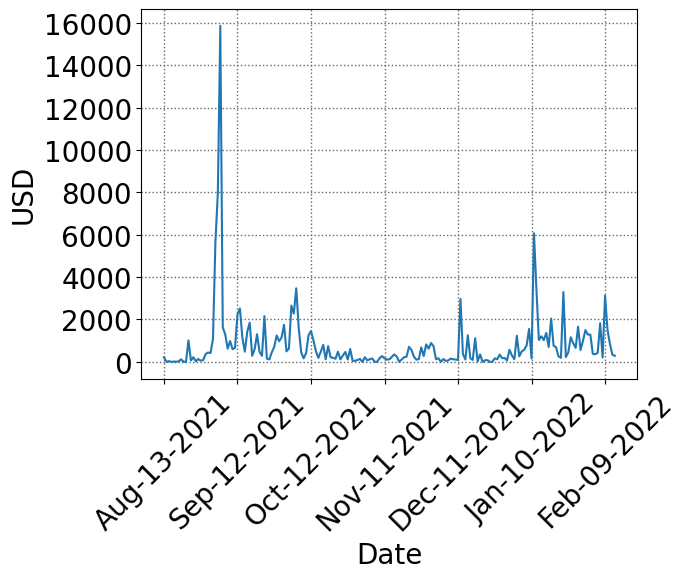

In [3]:
import numpy as np
import csv    #加载csv包便于读取csv文件
import zipfile
import os
import json
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

df=pd.read_csv("/mnt/sde1/geth/nft_analyse_v1/data/nftflow/csv/nftFlow_final.csv")
df = df[ (df["isError_1"]!="none") ]
df = df[ (df["isError_0"]=="None") & (df["isError_1"]!="None") ]
df.head(1)
tx_map={}
timestamp_map={}
for index,row in df.iterrows():
    tx_map[row["transactionHash_1"]]=1
    timestamp=row["timestamp"]
    ethPrice=float(row["ethPrice"])
    timestamp=timestamp_removeHour_reduce(timestamp)
    transactionFee_1=float(row["transactionFee_1"])/pow(10,18)
    transactionFee_1_usd=ethPrice*transactionFee_1
    try:
        timestamp_map[timestamp]+=(transactionFee_1_usd)
    except:
        timestamp_map[timestamp]=transactionFee_1_usd

print("sum tx: ",len(tx_map))
print("sum tx fee: ",sum(timestamp_map.values()))
        
list_key=[]
list_value=[]
minDate=datetime.datetime.fromtimestamp( min(df["timestamp"]) )
maxDate=datetime.datetime.fromtimestamp( max(df["timestamp"]) )

for tempTimestamp in max_min_2_timestampList_day(minDate,maxDate):
    if tempTimestamp not in timestamp_map:
        timestamp_map[tempTimestamp]=0
    
    list_key.append(timestamp_2_string_ymd(tempTimestamp))
    list_value.append( timestamp_map[tempTimestamp] )

x=[]
x_key=[]
for i in range(len(list_key)):
    if i%30==0:
        x.append(i)
        x_key.append(list_key[i])
plt.xticks(x,labels=x_key,fontsize=20,rotation=45)
plt.yticks(fontsize=20)
        
plt.plot(list_value,label="Total")
plt.xlabel('Date', fontsize=20)
plt.ylabel('USD',fontsize=20)
plt.grid(True, color='#666666', linestyle = ":", linewidth = "1")

plt.savefig("/mnt/sde1/geth/nft_analyse_v1/data/nftflow/photo/victim_fee.pdf",bbox_inches='tight')
